In [ ]:
# 引入函式庫
import os
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import itertools

2.1. [5 pts] Show parts of the dataset and browse it, you may notice some ambiguous
columns, like “Unnamed: 0” and “x”, “y”, “z”. Use any method to remove the
extraneous column “Unnamed: 0” and give the useful columns “x”, “y”, “z”
meaningful names.

In [ ]:
import pandas as pd

# Load the dataset
diamonds = pd.read_csv('Diamonds.csv')

# Display parts of the dataset
print(diamonds.head())

# Remove the "Unnamed: 0" column
diamonds = diamonds.drop(columns=['Unnamed: 0'])

# Rename "x", "y", "z" to meaningful names
diamonds = diamonds.rename(columns={'x': 'length', 'y': 'width', 'z': 'depth_z'})

print(diamonds.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
   carat      cut color clarity  depth  table  price  length  width  depth_z
0   0.23    Ideal     E     SI2   61.5   55.0    326    3.95   3.98     2.43
1   0.21  Premium     E     SI1   59.8   61.0    326    3.89   3.84     2.31
2   0.23     Good     E     VS1   56.9   65.0    327    4.05   4.07     2.31
3   0.29  Premium     I     VS2   62.4   58.0    334    4.20   4.23     2.63
4   0.31     Good     J     SI2   63.3   58.0    335    4.34   4.35     2.

2.2. Convert character columns to factor in R and categorical in Python, fit a log transformation to the target "price".

In [ ]:
print(diamonds.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
length     float64
width      float64
depth_z    float64
dtype: object


In [ ]:
# Assuming 'cut', 'color', 'clarity' are object (character) columns
diamonds['cut'] = diamonds['cut'].astype('category')
diamonds['color'] = diamonds['color'].astype('category')
diamonds['clarity'] = diamonds['clarity'].astype('category')

# Fit log transformation to the target "price"
diamonds['price'] = np.log(diamonds['price'])

# Display the dataset with updated data types
print(diamonds.dtypes)


carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price       float64
length      float64
width       float64
depth_z     float64
dtype: object


2.3. Bivariate analyses on "price" vs. other variables.

                sum_sq       df              F  PR(>F)
carat     47022.480315      1.0  298092.181698     0.0
Residual   8508.436984  53938.0            NaN     NaN


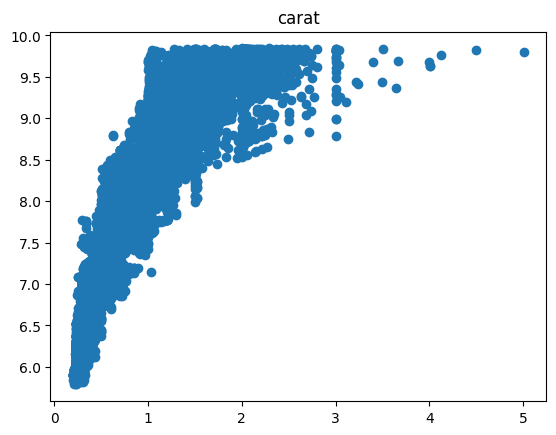

                sum_sq       df           F         PR(>F)
cut        1007.182928      4.0  249.076901  2.083479e-212
Residual  54523.734371  53935.0         NaN            NaN


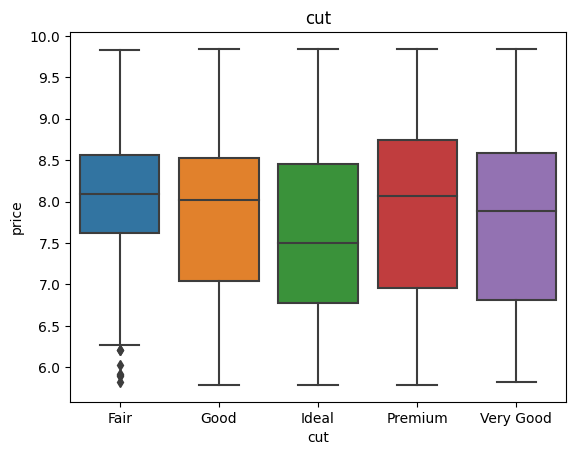

                sum_sq       df           F         PR(>F)
color      1431.255783      6.0  237.807767  3.767555e-301
Residual  54099.661516  53933.0         NaN            NaN


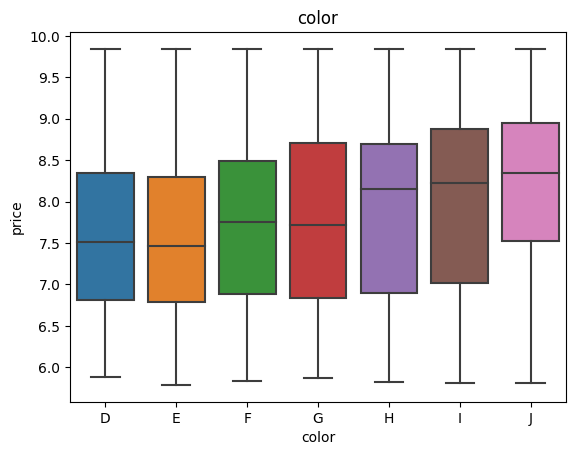

                sum_sq       df           F  PR(>F)
clarity    2836.786081      7.0  414.775241     0.0
Residual  52694.131218  53932.0         NaN     NaN


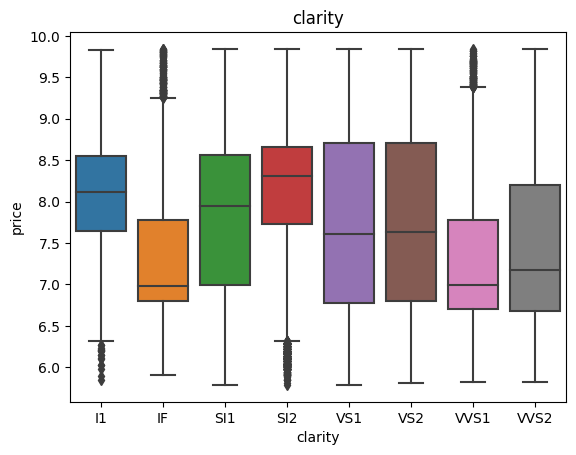

                sum_sq       df         F    PR(>F)
depth         0.041081      1.0  0.039903  0.841672
Residual  55530.876218  53938.0       NaN       NaN


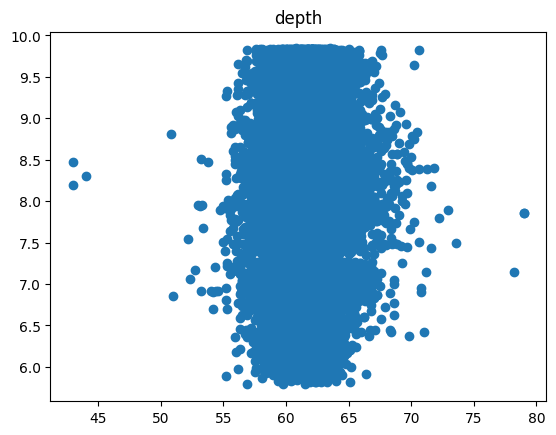

                sum_sq       df            F         PR(>F)
table      1389.924298      1.0  1384.712999  2.784138e-299
Residual  54140.993001  53938.0          NaN            NaN


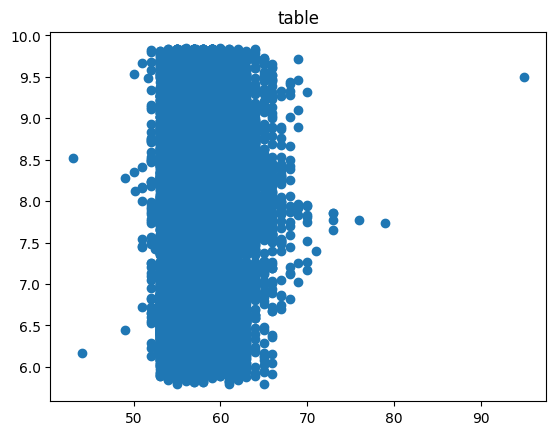

                sum_sq       df             F  PR(>F)
price     5.553092e+04      1.0  8.114943e+32     0.0
Residual  3.691001e-24  53938.0           NaN     NaN


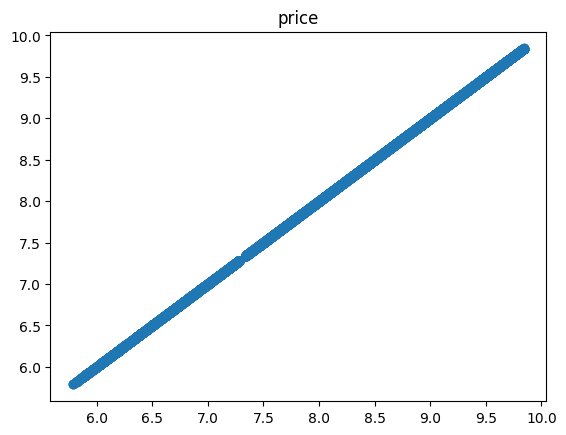

                sum_sq       df              F  PR(>F)
length    50965.335718      1.0  602106.923163     0.0
Residual   4565.581581  53938.0            NaN     NaN


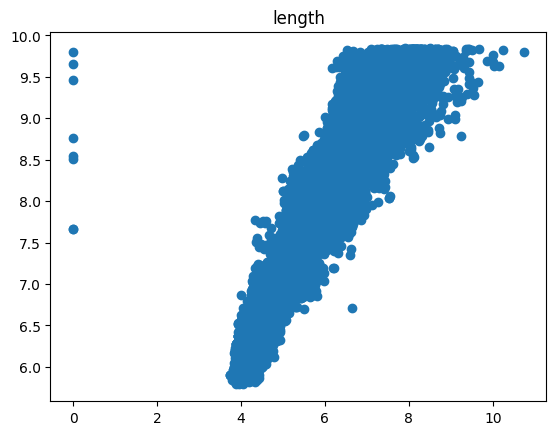

                sum_sq       df              F  PR(>F)
width     48668.390720      1.0  382523.204579     0.0
Residual   6862.526579  53938.0            NaN     NaN


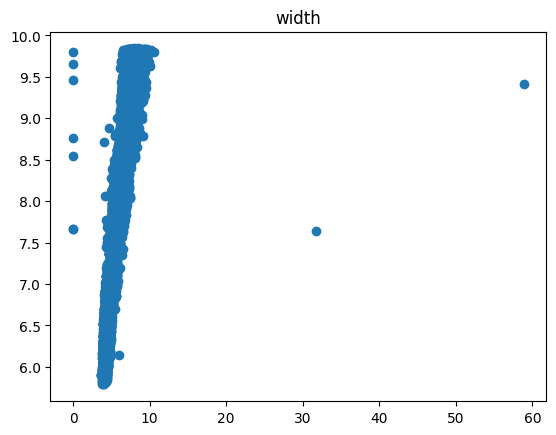

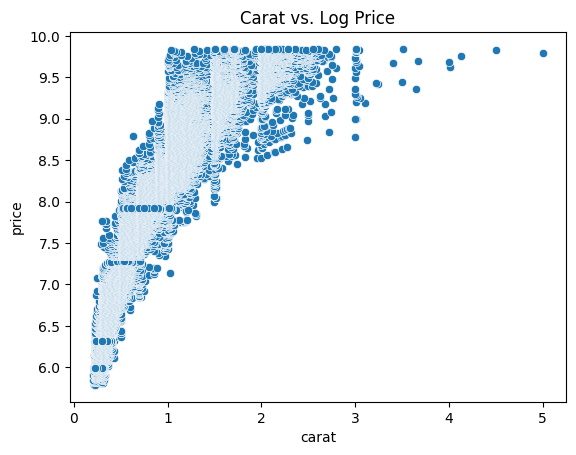

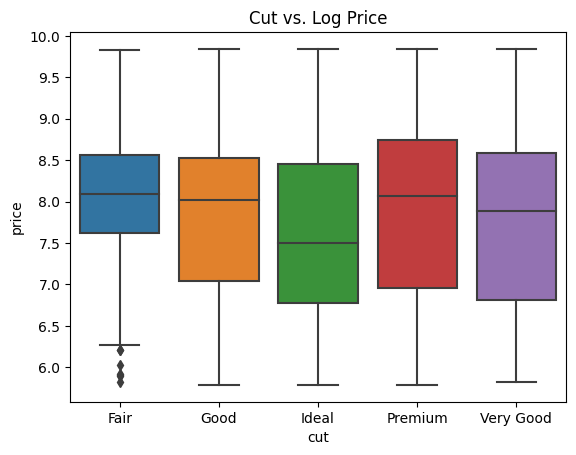

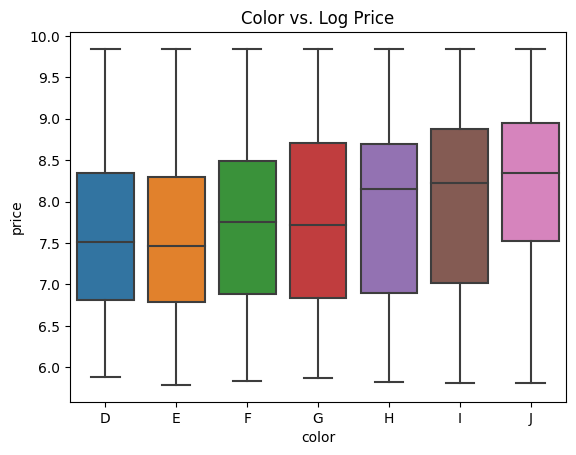

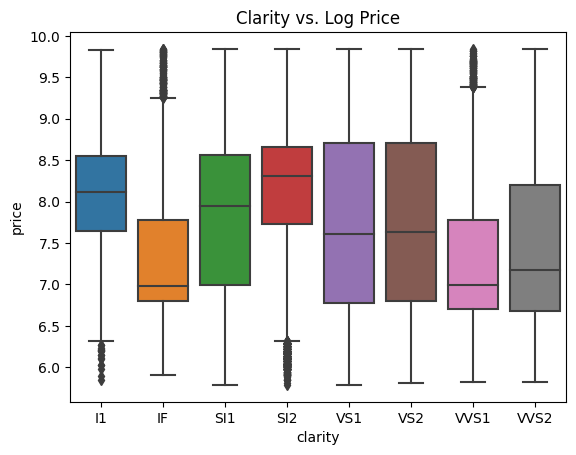

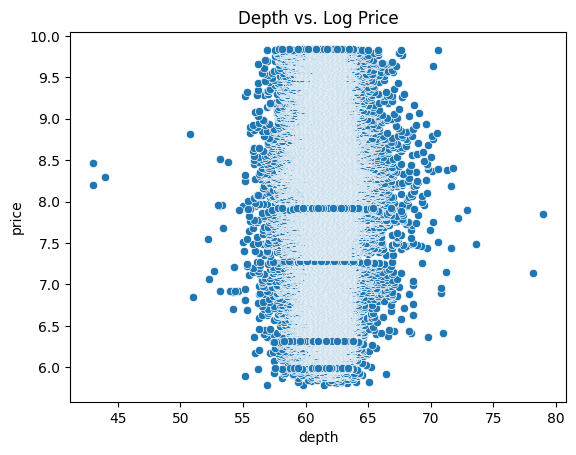

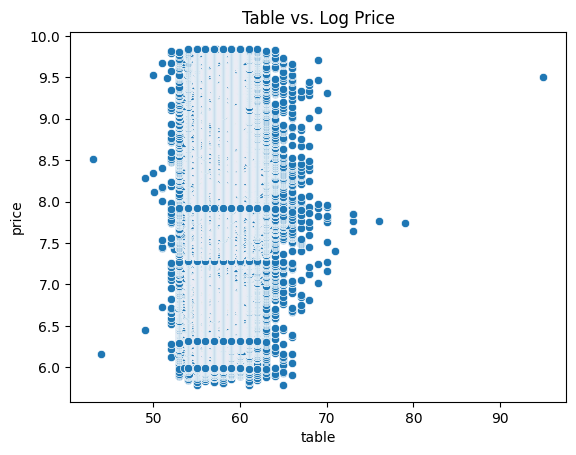

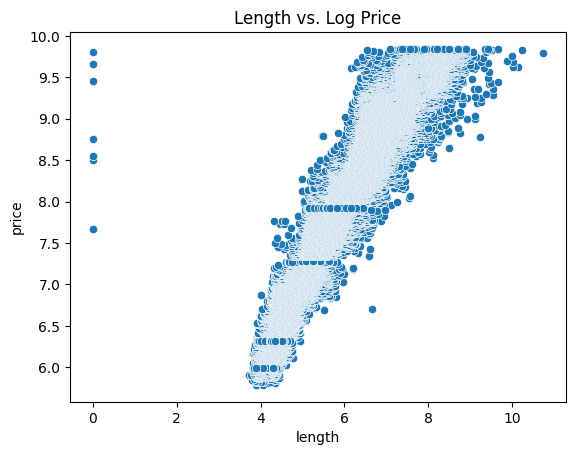

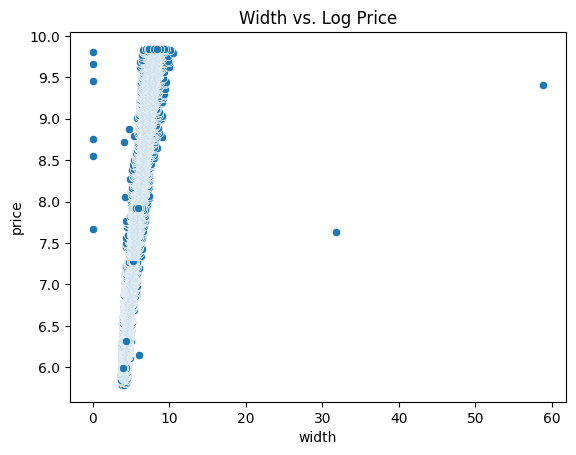

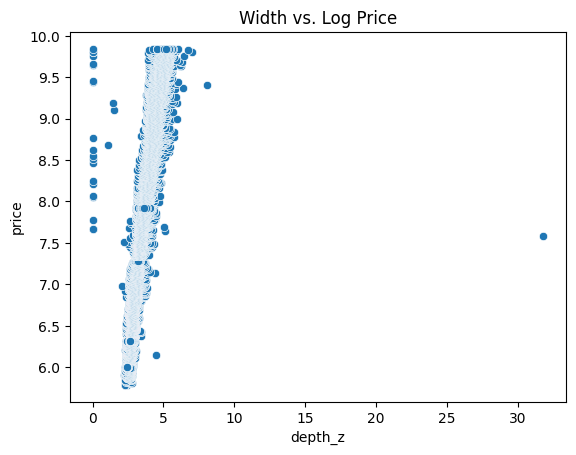

In [ ]:
price_cols = diamonds.columns[0:len(diamonds.columns)-1]
diamonds[price_cols].apply(lambda x:(print(sm.stats.anova_lm(ols('price ~ ' + x.name, data=diamonds).fit(), typ=2)),
                                (sns.boxplot(data=diamonds, x=x.name, y='price'), plt.title(x.name), plt.show()) if x.dtype == 'category'
                                else (plt.scatter(data=diamonds, x=x.name, y='price'), plt.title(x.name), plt.show())))

sns.scatterplot(x='carat', y='price', data=diamonds)
plt.title('Carat vs. Log Price')
plt.show()

sns.boxplot(x='cut', y='price', data=diamonds)
plt.title('Cut vs. Log Price')
plt.show()

sns.boxplot(x='color', y='price', data=diamonds)
plt.title('Color vs. Log Price')
plt.show()

sns.boxplot(x='clarity', y='price', data=diamonds)
plt.title('Clarity vs. Log Price')
plt.show()

sns.scatterplot(x=diamonds['depth'], y=diamonds['price'])
plt.title('Depth vs. Log Price')
plt.show()

sns.scatterplot(x='table', y='price', data=diamonds)
plt.title('Table vs. Log Price')
plt.show()

sns.scatterplot(x='length', y='price', data=diamonds)
plt.title('Length vs. Log Price')
plt.show()

sns.scatterplot(x='width', y='price', data=diamonds)
plt.title('Width vs. Log Price')
plt.show()


sns.scatterplot(x='depth_z', y='price', data=diamonds)
plt.title('Width vs. Log Price')
plt.show()


2.4. Split the dataset into training and testing sets, rescale continuous variables.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split dataset
train, test = train_test_split(diamonds, test_size=0.2, random_state=1)

# Rescale continuous variables
scaler = MinMaxScaler()
continuous_cols = ['carat', 'length', 'width', 'depth', 'table', 'depth_z']
train[continuous_cols] = scaler.fit_transform(train[continuous_cols])
test[continuous_cols] = scaler.transform(test[continuous_cols])


2.5. Build a linear model and report training/testing MAEs.

 OLS Regression Results  

In [ ]:
from sklearn.metrics import mean_absolute_error
# Fit the OLS model
formula_select = 'price ~ carat + length + width + depth + table + depth_z'
tr_lm_select = ols(formula_select, data=train).fit()

# Get predictions
train_preds = tr_lm_select.predict(train)
test_preds = tr_lm_select.predict(test)

# Print the OLS Regression Results summary
print(tr_lm_select.summary())

# Calculate Mean Absolute Error (MAE)
train_mae = mean_absolute_error(np.exp(train['price']), np.exp(train_preds))
test_mae = mean_absolute_error(np.exp(test['price']), np.exp(test_preds))

# Report MAEs
print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 8.612e+04
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:16:02   Log-Likelihood:                -6649.5
No. Observations:               43152   AIC:                         1.331e+04
Df Residuals:                   43145   BIC:                         1.337e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3385      0.038     35.517      0.0

2.6. Remove predictors with higher p-values and build a new linear model.

In [ ]:
import statsmodels.api as sm

# Assuming X_train contains your predictor variables and y_train is the target variable

# Define predictors and target
X_train = train[['carat', 'depth', 'table', 'length', 'width', 'depth_z']]
y_train = train['price']

# Fit the initial linear regression model using statsmodels
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Display summary to examine p-values
print(model.summary())

# Identify predictors with high p-values (e.g., p-value > 0.05)
high_p_value_predictors = model.pvalues[model.pvalues > 0.05].index

# Create a new set of predictors excluding those with high p-values
selected_features = [col for col in X_train.columns if col not in high_p_value_predictors]

# Refit the model using only selected predictors
new_X_train = X_train[selected_features]

# Fit the new model
new_model = sm.OLS(y_train, sm.add_constant(new_X_train)).fit()

# Display summary of the new model
print(new_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 8.612e+04
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        08:58:41   Log-Likelihood:                -6649.5
No. Observations:               43152   AIC:                         1.331e+04
Df Residuals:                   43145   BIC:                         1.337e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3385      0.038     35.517      0.0

2.7. Consider all two-way interactions without removing predictors and report training/testing MAEs.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# Extracting continuous columns for interaction terms
continuous_cols = ['carat', 'length', 'width', 'depth', 'table', 'depth_z']

# Creating interaction terms for the training set
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_interactions = poly.fit_transform(train[continuous_cols])

# Fitting a linear regression model with interactions on the training set
model_with_interactions = LinearRegression()
model_with_interactions.fit(X_train_interactions, train['price'])


# Predict on training data
train_preds_interactions = model_with_interactions.predict(X_train_interactions)

# Calculate Mean Absolute Error (MAE) for training data
train_mae_interactions = mean_absolute_error(np.exp(y_train), np.exp(train_preds_interactions))

# Creating interaction terms for the testing set using the same transformation as the training set
X_test_interactions = poly.transform(test[continuous_cols])

# Predict on testing data with the model trained on the training set
test_preds_interactions = model_with_interactions.predict(X_test_interactions)

# Calculate Mean Absolute Error (MAE) for testing data
test_mae_interactions = mean_absolute_error(np.exp(test['price']), np.exp(test_preds_interactions))

# Report MAE for the model with interactions on the testing set
print(f"Training MAE with interactions: {train_mae_interactions:.4f}")
print(f"Testing MAE with interactions: {test_mae_interactions:.4f}")


Training MAE with interactions: 786.4359
Testing MAE with interactions: 781.3632


3. [20 pts] Considering the linear regression models from question 1 and 2, which dataset do
you think is well-suited for linear regression modeling and which is not? For any datasets that
are not well-suited, explain why linear regression performs poorly. How could the prediction
accuracy be improved for those cases? Provide detailed explanations to support your
answers.

In [ ]:
text = """
資料集 1：

選擇變數模型具有合理的決定係數和 RMSE。
所有二階模型的 RMSE 非常低，可能表示過度擬合或與多重共線性相關的問題。
條件數較大，可能意味著存在多重共線性問題。
備註：
決定係數和調整後的決定係數值從選擇變數模型中有所改善。
存在關於強烈多重共線性或奇異設計矩陣的警告。
評估：
適用性：選擇變數模型似乎適用於線性回歸。但在所有二階模型中可能存在過度擬合或多重共線性的問題。
性能不佳的原因：可能存在多重共線性、奇異矩陣以及所有二階模型中的過度擬合問題。
改進建議：正則化技術，如 Ridge 或 Lasso 回歸，可以幫助減輕多重共線性問題。此外，特徵選擇或工程方法可以提升模型性能。

資料集 2：
高決定係數值表明了良好的擬合程度。
訓練集和測試集的 MAE 值相近，表示有良好的泛化能力。
評估：
適用性：鑑於高決定係數值和測試集上相對較低的 MAE，該資料集似乎非常適合線性回歸。
良好性能原因：預測變數和目標變數之間的強相關性有助於模型的良好擬合。
改進建議：為了進一步提高準確性，可以考慮交互作用或非線性轉換來增強預測準確度。

總結：
資料集 1：適中的擬合程度；可能存在過度擬合和多重共線性問題。
資料集 2：非常適合線性回歸；表現出良好的擬合程度和泛化能力。
對於資料集 1，解決多重共線性問題，利用正則化技術，或改進特徵選擇可以提升模型性能。對於資料集 2，探索非線性轉換或交互作用可能進一步提高預測能力。
"""

print(text)



資料集 1：

選擇變數模型具有合理的決定係數和 RMSE。
所有二階模型的 RMSE 非常低，可能表示過度擬合或與多重共線性相關的問題。
條件數較大，可能意味著存在多重共線性問題。
備註：
決定係數和調整後的決定係數值從選擇變數模型中有所改善。
存在關於強烈多重共線性或奇異設計矩陣的警告。
評估：
適用性：選擇變數模型似乎適用於線性回歸。但在所有二階模型中可能存在過度擬合或多重共線性的問題。
性能不佳的原因：可能存在多重共線性、奇異矩陣以及所有二階模型中的過度擬合問題。
改進建議：正則化技術，如 Ridge 或 Lasso 回歸，可以幫助減輕多重共線性問題。此外，特徵選擇或工程方法可以提升模型性能。

資料集 2：
高決定係數值表明了良好的擬合程度。
訓練集和測試集的 MAE 值相近，表示有良好的泛化能力。
評估：
適用性：鑑於高決定係數值和測試集上相對較低的 MAE，該資料集似乎非常適合線性回歸。
良好性能原因：預測變數和目標變數之間的強相關性有助於模型的良好擬合。
改進建議：為了進一步提高準確性，可以考慮交互作用或非線性轉換來增強預測準確度。

總結：
資料集 1：適中的擬合程度；可能存在過度擬合和多重共線性問題。
資料集 2：非常適合線性回歸；表現出良好的擬合程度和泛化能力。
對於資料集 1，解決多重共線性問題，利用正則化技術，或改進特徵選擇可以提升模型性能。對於資料集 2，探索非線性轉換或交互作用可能進一步提高預測能力。

